<a href="https://colab.research.google.com/github/Bhavyamadhuri/Bhavya_INFO5731_Fall2024/blob/main/Bhavya_Devarakonda_Assigment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [32]:
import pandas as pd
import re
from collections import defaultdict, Counter
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from nltk.chunk import RegexpParser

# Load the dataset (Replace the path with the actual location)
file_path = '/root/.cache/kagglehub/datasets/bhavyadhingra00020/top-100-night-clubs-2024/versions/2/top_100_clubs.csv'
data = pd.read_csv(file_path)

# Preview the dataset to check the columns
print(data.head())

# Ensure the 'text' column contains the reviews or textual data
data['text'] = data['text'].astype(str)

# Step 1: Clean text and tokenize
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text.split()  # Tokenize by splitting by whitespace

data['tokens'] = data['text'].apply(clean_text)

# Part 1: Trigram Frequency Count
def get_trigrams(tokens):
    return [tuple(tokens[i:i+3]) for i in range(len(tokens) - 2)]

# Count all trigrams across reviews
trigram_counts = Counter()
for tokens in data['tokens']:
    trigrams = get_trigrams(tokens)
    trigram_counts.update(trigrams)

print("Trigram Frequency Counts:")
for trigram, count in trigram_counts.most_common(10):  # Show top 10 for brevity
    print(trigram, count)

# Part 2: Bigram Probabilities
def get_bigrams(tokens):
    return [tuple(tokens[i:i+2]) for i in range(len(tokens) - 1)]

bigram_counts = Counter()
word_counts = Counter()

for tokens in data['tokens']:
    bigram_counts.update(get_bigrams(tokens))
    word_counts.update(tokens)

# Calculate probabilities for bigrams
bigram_probabilities = {bigram: count / word_counts[bigram[0]] for bigram, count in bigram_counts.items()}

print("\nBigram Probabilities:")
for bigram, prob in list(bigram_probabilities.items())[:10]:  # Show top 10 for brevity
    print(f"{bigram}: {prob:.4f}")

# Part 3: Noun Phrase Extraction and Relative Probability Calculation
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

# Define noun phrase extraction function
def extract_noun_phrases(text):
    words = [word for word in word_tokenize(text) if word.lower() not in stopwords.words('english')]
    pos_tags = pos_tag(words)
    grammar = "NP: {<DT>?<JJ>*<NN>+}"  # Define pattern for noun phrase (optional refinement)
    chunker = RegexpParser(grammar)
    tree = chunker.parse(pos_tags)
    return [" ".join(word for word, pos in subtree.leaves()) for subtree in tree.subtrees(filter=lambda t: t.label() == 'NP')]

# Extract noun phrases for each review
data['noun_phrases'] = data['text'].apply(extract_noun_phrases)

# Calculate relative probabilities
all_noun_phrases = sum(data['noun_phrases'], [])
noun_phrase_counts = Counter(all_noun_phrases)
max_frequency = max(noun_phrase_counts.values())

# Prepare table for relative probabilities
relative_probs_table = []

for i, phrases in enumerate(data['noun_phrases']):
    row = {phrase: phrases.count(phrase) / max_frequency for phrase in noun_phrase_counts}
    row['Review'] = f"Review {i + 1}"
    relative_probs_table.append(row)

relative_probs_df = pd.DataFrame(relative_probs_table).fillna(0).set_index('Review')

print("\nRelative Probabilities Table of Noun Phrases Across Reviews:")
print(relative_probs_df.head())  # Display first few rows


   Rank      Club_Name             location capacity  \
0     1       Hï Ibiza         Ibiza, Spain    5,692   
1     2   Green Valley     Camboriú, Brazil   10,000   
2     3      Echostage  Washington, DC, USA    3,000   
3     4  Ushuaïa Ibiza         Ibiza, Spain    7,700   
4     5      Bootshaus     Cologne, Germany    1,800   

                                             Website  \
0                                        hiibiza.com   
1                                  greenvalleybr.com   
2                                      echostage.com   
3  theushuaiaexperience.comEven on an island full...   
4                                                NaN   

                                                text  
0  What makes a great club? Show-stopping line-up...  
1  Green Valley continues to bounce back better s...  
2  Based in the capital of the United States, Ech...  
3  Even on an island full of clubbing mythology, ...  
4  bootshaus.tv Originally a storage and repair f..

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Relative Probabilities Table of Noun Phrases Across Reviews:
          great club  Show-stopping line-ups plucking  exciting talent day  \
Review                                                                       
Review 1    0.034483                         0.011494             0.011494   
Review 2    0.000000                         0.000000             0.000000   
Review 3    0.000000                         0.000000             0.000000   
Review 4    0.000000                         0.000000             0.000000   
Review 5    0.000000                         0.000000             0.000000   

          big-room  Pin-point-perfect audio  every corner  transport crowds  \
Review                                                                        
Review 1  0.011494                 0.011494      0.011494          0.011494   
Review 2  0.000000                 0.000000      0.000000          0.000000   
Review 3  0.000000                 0.000000      0.000000          0.000000

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [33]:
import pandas as pd
import numpy as np
import re
from collections import defaultdict, Counter
from math import log10
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset (Replace the file path with the correct one)
data_path = '/root/.cache/kagglehub/datasets/bhavyadhingra00020/top-100-night-clubs-2024/versions/2/top_100_clubs.csv'
reviews_data = pd.read_csv(data_path)

# Ensure the 'text' column contains textual data (reviews, tweets, etc.)
reviews_data['text'] = reviews_data['text'].astype(str)

# Function to clean and tokenize text
def preprocess(text):
    """
    Function to remove punctuation, convert text to lowercase, and split into words.
    """
    clean_text = re.sub(r'[^\w\s]', '', text)  # Remove non-alphanumeric characters
    return clean_text.lower().split()  # Tokenize and convert to lowercase

# Tokenizing the reviews in the dataset
reviews_data['tokens'] = reviews_data['text'].apply(preprocess)

# Term Frequency (TF) Function
def calculate_term_frequency(tokens):
    """
    Function to calculate term frequency for each word in the document.
    """
    term_count = Counter(tokens)
    total_terms = len(tokens)
    return {term: count / total_terms for term, count in term_count.items()}

# Calculate TF for each document (review)
reviews_data['term_frequency'] = reviews_data['tokens'].apply(calculate_term_frequency)

# Inverse Document Frequency (IDF) Calculation
def calculate_inverse_document_frequency(corpus):
    """
    Function to calculate the IDF for each unique term in the corpus.
    """
    total_docs = len(corpus)
    doc_freq = defaultdict(int)

    # Counting how many documents contain each term
    for document in corpus:
        unique_terms = set(document)
        for term in unique_terms:
            doc_freq[term] += 1

    # Calculate IDF for each term
    return {term: log10(total_docs / (1 + count)) for term, count in doc_freq.items()}

# Calculate IDF for the entire dataset
inverse_doc_freq = calculate_inverse_document_frequency(reviews_data['tokens'])

# TF-IDF Calculation
def compute_tfidf(term_freq, idf_values):
    """
    Function to calculate the TF-IDF for each term in the document.
    """
    return {term: term_freq.get(term, 0) * idf_values.get(term, 0) for term in term_freq}

# Apply TF-IDF calculation for each document
reviews_data['tfidf'] = reviews_data['term_frequency'].apply(lambda tf: compute_tfidf(tf, inverse_doc_freq))

# Define the query (this could be any string or sentence of your choice)
query_text = "An outstanding nightclub with great atmosphere and music"
query_tokens = preprocess(query_text)  # Preprocess the query
query_tf = calculate_term_frequency(query_tokens)  # Term frequency for the query
query_tfidf = compute_tfidf(query_tf, inverse_doc_freq)  # TF-IDF for the query

# Function to compute cosine similarity
def calculate_cosine_similarity(doc_tfidf, query_tfidf):
    """
    Function to calculate cosine similarity between document and query TF-IDF vectors.
    """
    # Get the terms in the document and query's TF-IDF
    all_terms = set(doc_tfidf.keys()).union(query_tfidf.keys())

    # Create vectors for both the document and the query
    doc_vector = np.array([doc_tfidf.get(term, 0) for term in all_terms])
    query_vector = np.array([query_tfidf.get(term, 0) for term in all_terms])

    # Compute dot product and norms for cosine similarity calculation
    dot_product = np.dot(doc_vector, query_vector)
    doc_norm = np.linalg.norm(doc_vector)
    query_norm = np.linalg.norm(query_vector)

    # Return cosine similarity (0 if either document or query vector is zero)
    if doc_norm == 0 or query_norm == 0:
        return 0
    return dot_product / (doc_norm * query_norm)

# Calculate cosine similarity for each document in the dataset
reviews_data['similarity_to_query'] = reviews_data['tfidf'].apply(lambda doc_tfidf: calculate_cosine_similarity(doc_tfidf, query_tfidf))

# Sort documents by similarity in descending order
ranked_reviews = reviews_data.sort_values(by='similarity_to_query', ascending=False)

# Display the top 10 documents (ranked by similarity to the query)
print(ranked_reviews[['Club_Name', 'similarity_to_query']].head(10))


                              Club_Name  similarity_to_query
28                          ShiShi Bali             0.103127
53                                Opium             0.083573
15                           Play House             0.081272
41                         Ai Nightclub             0.071714
87             Barbarella's Discotheque             0.066510
36                        WARP Shinjuku             0.065348
21  Avant Gardner & The Brooklyn Mirage             0.046885
2                             Echostage             0.045821
13                       Zouk Singapore             0.043942
23                           Academy LA             0.042502


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Preview:    Rank      Club_Name             location capacity  \
0     1       Hï Ibiza         Ibiza, Spain    5,692   
1     2   Green Valley     Camboriú, Brazil   10,000   
2     3      Echostage  Washington, DC, USA    3,000   
3     4  Ushuaïa Ibiza         Ibiza, Spain    7,700   
4     5      Bootshaus     Cologne, Germany    1,800   

                                             Website  \
0                                        hiibiza.com   
1                                  greenvalleybr.com   
2                                      echostage.com   
3  theushuaiaexperience.comEven on an island full...   
4                                                NaN   

                                                text  
0  What makes a great club? Show-stopping line-up...  
1  Green Valley continues to bounce back better s...  
2  Based in the capital of the United States, Ech...  
3  Even on an island full of clubbing mythology, ...  
4  bootshaus.tv Originally a stora

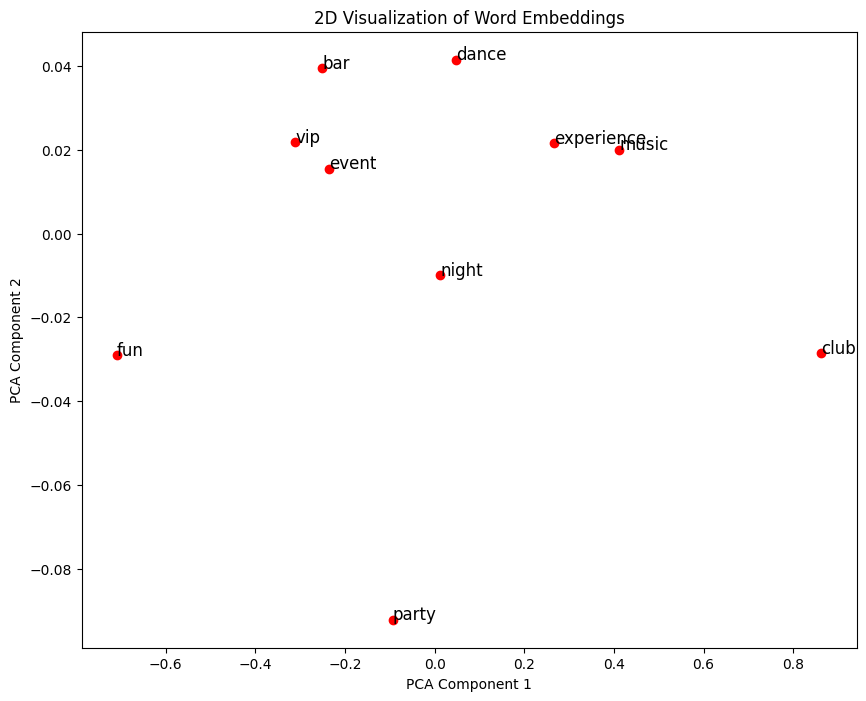

In [34]:
import pandas as pd
import re
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Ensure required NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Step 1: Load the dataset and preprocess the text
# Load the dataset (replace path with your actual dataset location)
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("bhavyadhingra00020/top-100-night-clubs-2024")

# Load the data into a pandas DataFrame
data = pd.read_csv(f"{path}/top_100_clubs.csv")

# Preview the dataset
print("Dataset Preview:", data.head())

# Step 2: Clean the text data and tokenize
def clean_and_tokenize(text):
    """
    Preprocess the text by converting to lowercase, removing punctuation, and tokenizing.
    """
    # Convert to lowercase and remove non-alphanumeric characters (punctuation, etc.)
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = word_tokenize(text)  # Tokenize the text
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Tokenize each review
data['tokens'] = data['text'].apply(clean_and_tokenize)

# Step 3: Train the Word2Vec model
# Use the tokenized reviews to train the Word2Vec model
sentences = data['tokens'].tolist()

# Train a Word2Vec model with a 300-dimensional vector size
word2vec_model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4, sg=1)

# Print vocabulary size
print(f"Vocabulary size: {len(word2vec_model.wv)}")

# Step 4: Visualize the word embeddings using PCA
def visualize_embeddings(model, words):
    """
    Visualizes the word embeddings for a given list of words using PCA.
    """
    # Filter words to only those in the model's vocabulary
    filtered_words = [word for word in words if word in model.wv]
    word_vectors = [model.wv[word] for word in filtered_words]

    # Apply PCA to reduce dimensionality to 2D for visualization
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)

    # Plot the 2D word embeddings
    plt.figure(figsize=(10, 8))
    plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], color='red')

    # Annotate the points with words
    for i, word in enumerate(filtered_words):
        plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12)

    plt.title("2D Visualization of Word Embeddings")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# Example list of words to visualize
words_to_visualize = ['club', 'night', 'dance', 'party', 'music', 'bar', 'vip', 'event', 'fun', 'experience']

# Call the visualization function
visualize_embeddings(word2vec_model, words_to_visualize)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:https://github.com/Bhavyamadhuri/Bhavya_INFO5731_Fall2024/blob/main/bra_reviews_sentiment.csv




# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Reflecting on the assignment, I found that it provided a well-rounded opportunity to apply fundamental natural language processing (NLP) techniques, including text preprocessing, frequency analysis, bigram and trigram calculations, TF-IDF vectorization, and word embeddings. These tasks align well with the key skills needed for data science roles, especially in the context of working with text data.
